In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout,Flatten


C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
da=pd.read_csv('NSE-RELIANCE.csv',parse_dates=True)
df = pd.read_csv('NSE-RELIANCE.csv',index_col="Date",parse_dates=True)
df.fillna(method='ffill',inplace=True)
df.head(2)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2019-04-01,1097.4,1104.45,1081.1,1099.6,1098.65,8465141.0,92529.47
2019-03-01,1107.5,1114.60,1090.1,1090.3,1092.75,7446457.0,82012.92


In [3]:
df_open= df['Open'].values
df_open = df_open.reshape(-1, 1) #output:(is a 1 dimensional columnar array)
print(df_open.shape)
df_open[:5]

(5184, 1)


array([[1097.4 ],
       [1107.5 ],
       [1114.5 ],
       [1125.25],
       [1130.95]])

In [4]:
train = df['1998-03-20':'2017-12-31']
#train= train.drop('Date', 1)


#print('Test Dataset:',test.shape)
#print (train.head())
test  =df['2018-01-01':'2018-12-31']
#print (test.head())

In [5]:
train_open= train['Open'].values
train_open = train_open.reshape(-1, 1)

print(train_open.shape)

train_open[:]

(4916, 1)


array([[926.5 ],
       [925.25],
       [933.  ],
       ...,
       [184.  ],
       [178.5 ],
       [175.35]])

In [6]:
test_open= test['Open'].values
test_open = test_open.reshape(-1, 1)

print(test_open.shape)

test_open[:]

(246, 1)


array([[1130.95],
       [1125.5 ],
       [1107.2 ],
       [1085.8 ],
       [1100.9 ],
       [1125.  ],
       [1121.  ],
       [1141.5 ],
       [1123.3 ],
       [1115.95],
       [1103.1 ],
       [1128.  ],
       [1099.  ],
       [1066.  ],
       [1110.  ],
       [1129.45],
       [1149.  ],
       [1143.75],
       [1158.  ],
       [1174.9 ],
       [1172.3 ],
       [1161.  ],
       [1132.45],
       [1107.9 ],
       [1109.  ],
       [1114.5 ],
       [1137.5 ],
       [1145.  ],
       [1132.9 ],
       [1097.95],
       [1096.95],
       [1105.05],
       [1074.  ],
       [1097.7 ],
       [1106.25],
       [1115.  ],
       [1094.  ],
       [1073.45],
       [1067.  ],
       [1067.9 ],
       [1059.  ],
       [1085.5 ],
       [1046.  ],
       [1032.9 ],
       [1036.  ],
       [1074.9 ],
       [1052.75],
       [1110.  ],
       [1100.  ],
       [1179.  ],
       [1146.  ],
       [1129.9 ],
       [1104.95],
       [1064.  ],
       [1093.9 ],
       [11

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
train_open = scaler.fit_transform(train_open)
train_open[1:]
print(train_open.shape)

(4916, 1)


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
test_open = scaler.fit_transform(test_open)
test_open[:5]
print(test_open.shape)

(246, 1)


In [9]:
# converting my 1d array into 2 day array with 60 values in each nested list train_open had 1d array.
#now after implementing the function timestamp it is converting into 2 d array . 
#A list within a list containing 60 values

In [10]:
def timestamp(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y
#count_row = df.shape[0]  # gives number of row count
#count_col = df.shape[1]  # gives number of col count

In [11]:
x_train, y_train = timestamp(train_open)
x_train.shape
#x_train[1:]
y_train[1:]



array([0.24266133, 0.24297428, 0.24306816, ..., 0.02547412, 0.02375289,
       0.0227671 ])

In [12]:
x_test, y_test = timestamp(test_open)
x_test[:1]

array([[0.57807876, 0.56567266, 0.52401548, 0.47530162, 0.50967448,
        0.56453449, 0.55542909, 0.60209424, 0.56066469, 0.54393353,
        0.51468245, 0.57136353, 0.50534942, 0.43022991, 0.53038926,
        0.57466424, 0.61916686, 0.60721603, 0.63965399, 0.67812429,
        0.67220578, 0.64648304, 0.58149328, 0.52560892, 0.52811291,
        0.54063282, 0.59298885, 0.61006146, 0.58251764, 0.50295925,
        0.5006829 , 0.51912133, 0.4484407 , 0.50239017, 0.52185295,
        0.541771  , 0.49396768, 0.44718871, 0.43250626, 0.43455497,
        0.41429547, 0.47461871, 0.38470294, 0.35488277, 0.36193945,
        0.45048941, 0.40006829, 0.53038926, 0.50762577, 0.68745732]])

In [13]:
# Reshape features for LSTM Layer (3d array for lstm)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(4866, 50, 1)
(196, 50, 1)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [14]:
l_model = Sequential()


l_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50))
l_model.add(Dropout(0.2))


l_model.add(Dense(units=1))

l_model.compile(loss='mean_squared_error', optimizer='adam')
history=l_model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3892 samples, validate on 974 samples
Epoch 1/10
3892/3892 [==============================] - 17s 4ms/step - loss: 0.0072 - val_loss: 2.9115e-04
Epoch 2/10
3892/3892 [==============================] - 13s 3ms/step - loss: 0.0022 - val_loss: 6.2789e-05
Epoch 3/10
3892/3892 [==============================] - 14s 4ms/step - loss: 0.0022 - val_loss: 5.3478e-05
Epoch 4/10
3892/3892 [==============================] - 14s 4ms/step - loss: 0.0017 - val_loss: 6.6458e-05
Epoch 5/10
3892/3892 [==============================] - 14s 4ms/step - loss: 0.0018 - val_loss: 1.0889e-04
Epoch 6/10
3892/3892 [==============================] - 14s 3ms/step - loss: 0.0016 - val_loss: 2.3523e-04
Epoch 7/10
3892/3892 [==============================] - 13s 3ms/step - loss:

In [15]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


In [16]:
#running the algo on the x_test and converting the value into the actual price removing the minmax scale
testPredict = l_model.predict(x_test, batch_size=32)
testPredict=scaler.inverse_transform(testPredict)

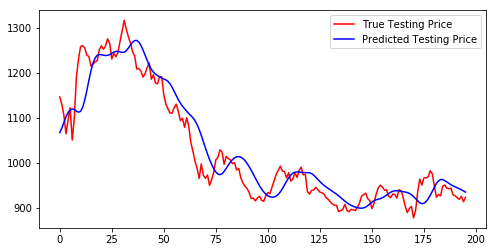

In [17]:
#y_test was previous scaled using minmax so get the actual value it is inversed 
#test_predict is the x_test set which is used after training the train set as the predicting model
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(testPredict, color='blue', label='Predicted Testing Price')
plt.legend()

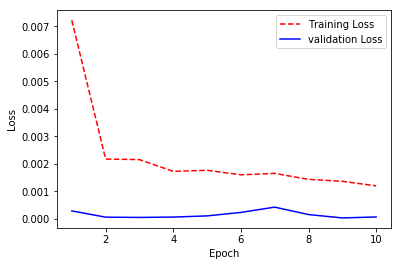

In [18]:
 #Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


# Error Evaluation Metrics :

In [19]:
import math 
score = l_model.evaluate(x_test, y_test, batch_size=32)

MSE = score
RMSE = math.sqrt(score)
print ("value of Mean square error:", MSE)
print("value of Root mean square error:",RMSE)

196/196 [==============================] - 0s 819us/step
value of Mean square error: 0.00845147924478717
value of Root mean square error: 0.09193192723307377


In [20]:
from sklearn import metrics
print('R2: ', metrics.r2_score(y_test_scaled, testPredict))

R2:  0.8954242939362937


In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_scaled, testPredict)

0.8982960406388305